In [ ]:
import pandas as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

# I. Đọc dữ liệu

In [ ]:
data = pd.read_csv("/content/CarInsurance.csv")

In [ ]:
data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


# II. Xử lý dữ liệu

In [ ]:
# Xóa các dòng dư thừa
data.dropna(how='all', inplace=True)

In [ ]:
# Xem dữ liệu bị thiếu
len(data)-data.count()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [ ]:
# Xóa các cột thiếu dữ liệu job
data = data.dropna(subset=['Job'])

In [ ]:
education_mapping = {
    "management": "tertiary",
    "blue-collar": "primary",
    "student": "primary",
    "technician": "tertiary",
    "admin.": "secondary",
    "services": "secondary",
    "self-employed": "secondary",
    "retired": "primary",
    "housemaid": "primary",
    "entrepreneur": "secondary",
    "unemployed": "unknown"
}
# Điền dữ liệu thiếu trong cột "Education" dựa trên cột "Job"
data['Education'] = data.apply(lambda row: education_mapping[row['Job']] if pd.isnull(row['Education']) else row['Education'], axis=1)


<ipython-input-18-c893c4269e84>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education'] = data.apply(lambda row: education_mapping[row['Job']] if pd.isnull(row['Education']) else row['Education'], axis=1)


Không thể xóa dữ liệu (vì bị thiếu quá nhiều cột)  hay dựa vào cột khác để điền vào cột Communication và Outcome được, nên xin phép giữ nguyên

In [ ]:
# Xử lý dữ liệu không nhất quán đối với các biến phân loại
# Tuổi từ 18 - 99
print('Tuổi lớn nhất ',data['Age'].max(),'\nTuổi nhỏ nhất', data['Age'].min())

# Job
print('Job: ',data['Job'].unique())

# Marital
print('Marital: ',data['Marital'].unique()) # 0 với 1

# Education
print('Education: ',data['Education'].unique())

# Default
print('Default: ',data['Default'].unique())

# HHInsurance
print('HHInsurance: ',data['HHInsurance'].unique())

# CarLoan
print('CarLoan: ',data['CarLoan'].unique())

# Communication
print('Communication: ',data['Communication'].unique())

# Outcome
print('Outcome: ',data['Outcome'].unique())

# CarInsurance
print('CarInsurance: ',data['CarInsurance'].unique())

# LastContactMonth
print('LastContactMonth: ',data['LastContactMonth'].unique())

Tuổi lớn nhất  95 
Tuổi nhỏ nhất 18
Job:  ['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' 'housemaid' 'entrepreneur' 'unemployed']
Marital:  ['single' 'married' 'divorced']
Education:  ['tertiary' 'primary' 'secondary' 'unknown']
Default:  [0 1]
HHInsurance:  [1 0]
CarLoan:  [0 1]
Communication:  ['telephone' nan 'cellular']
Outcome:  [nan 'failure' 'other' 'success']
CarInsurance:  [0 1]
LastContactMonth:  ['jan' 'may' 'jun' 'mar' 'nov' 'jul' 'aug' 'sep' 'apr' 'feb' 'oct' 'dec']


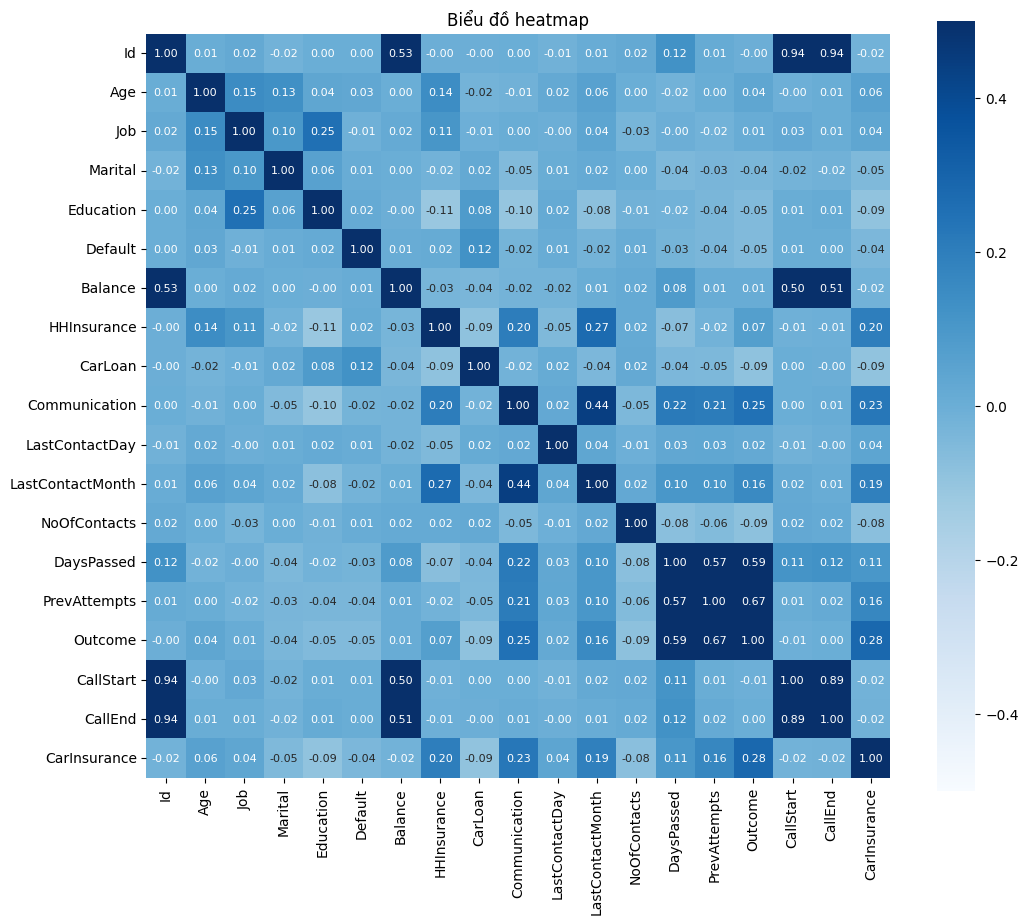

In [ ]:
corr_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True, vmin=-0.5, vmax=0.5,
            fmt='.2f', annot_kws={'fontsize': 8})
plt.title('Biểu đồ heatmap')
plt.show()

In [ ]:
# Tính IQR
Q1 = data['Balance'].quantile(0.25)
Q3 = data['Balance'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn dưới và giới hạn trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định giá trị ngoại lệ
outliers = (data['Balance'] < lower_bound) | (data['Balance'] > upper_bound)

# In giá trị ngoại lệ
print("Giá trị ngoại lệ:")
print( data.loc[outliers, 'Balance'])
print('Giá trị ngoại lệ nhỏ nhất: ',data.loc[outliers, 'Balance'].min())

Giá trị ngoại lệ:
17       7331
21       8304
31       6981
40       3935
52       4420
        ...  
3953    10250
3961     7154
3967     4780
3975     4229
3982     4930
Name: Balance, Length: 383, dtype: int64
Giá trị ngoại lệ nhỏ nhất:  -3058


Từ biểu đồ trên cho thấy không có sự tương quan giữa các biến, những chỉ số lớn hơn 0.7 ở trên chỉ liên quan đến các biến CallStart, CallEnd vì là thời gian nên không thể đo lường tương quan được

In [ ]:
data.to_csv('Carlnsuranve_new.csv', index=False)